# Data Preparation & EDA

In [1]:
# Step 1: Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Menampilkan semua kolom dataframe
pd.set_option('display.max_columns', None)

# Step 2: Load dataset dari URL
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/wine_data.csv"
df = pd.read_csv(url)



In [2]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
0,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,0
1,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0,2
2,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,1
3,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0
4,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [3]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Y    

In [ ]:
df.isnull().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Y                               0
dtype: int64

In [ ]:
# Bining 
# Membuat kategori untuk fitur alcohol
# kita bagi jadi 3 kategori: Low, Medium, High
df['alcohol_bin'] = pd.cut(df['alcohol'],
                           bins=3,
                           labels=['Low', 'Medium', 'High'])

# Membuat kategori untuk fitur color_intensity
df['color_intensity_bin'] = pd.cut(df['color_intensity'],
                                   bins=3,
                                   labels=['Light', 'Moderate', 'Dark'])

# Menampilkan hasil binning
df[['alcohol', 'alcohol_bin', 'color_intensity', 'color_intensity_bin']].head(10)


,alcohol,alcohol_bin,color_intensity,color_intensity_bin
0,13.73,High,5.70,Moderate
1,14.13,High,9.20,Dark
2,12.16,Low,2.45,Light
3,13.07,Medium,3.70,Light
4,13.16,Medium,5.68,Moderate
5,11.76,Low,3.80,Light
6,12.08,Low,3.30,Light
7,13.75,High,5.60,Moderate
8,13.78,High,9.58,Dark
9,12.58,Medium,7.60,Moderate


## Histogram Distribusi Kadar Alkohol per Kelas Wine

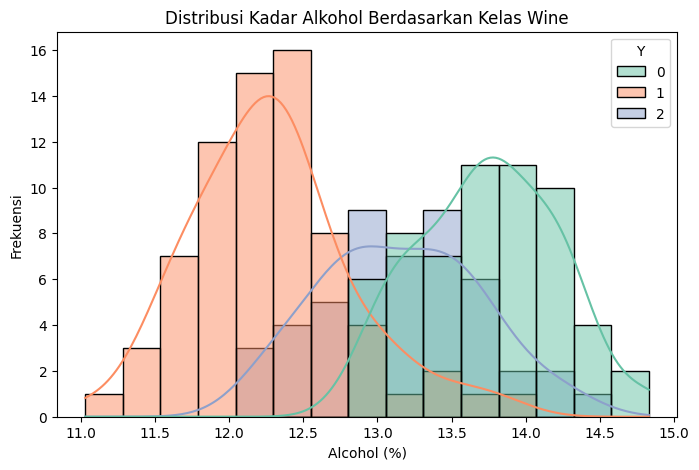

In [7]:
#Visualization
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='alcohol', hue='Y', kde=True, bins=15, palette='Set2')
plt.title('Distribusi Kadar Alkohol Berdasarkan Kelas Wine')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frekuensi')
plt.show()


Dari grafik terlihat bahwa setiap kelas wine memiliki pola kadar alkohol yang berbeda-beda.
Kelas 1 (warna oranye) cenderung memiliki kadar alkohol paling rendah (sekitar 11–12.5%).
Kelas 2 (warna ungu/biru) memiliki kadar alkohol sedang (sekitar 12.5–13.2%).
Sedangkan kelas 0 (warna hijau) didominasi oleh kadar alkohol tinggi (sekitar 13.2–14.5%).
Hal ini menunjukkan bahwa kadar alkohol dapat menjadi salah satu fitur penting dalam membedakan jenis wine.
Maka, aturan PRISM yang mungkin terbentuk nanti misalnya:
“Jika kadar alcohol tinggi → kemungkinan besar wine termasuk kelas 0.”

## Scatterplot Alcohol vs Color Intensity

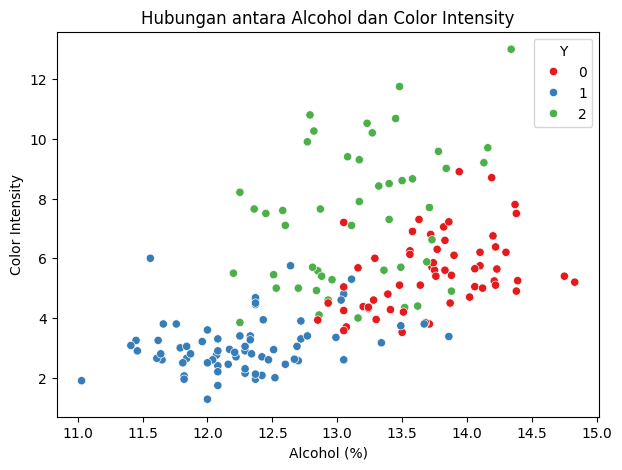

In [8]:
#visualization 
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='alcohol', y='color_intensity', hue='Y', palette='Set1')
plt.title('Hubungan antara Alcohol dan Color Intensity')
plt.xlabel('Alcohol (%)')
plt.ylabel('Color Intensity')
plt.show()


Dari scatterplot di atas terlihat bahwa setiap kelas wine memiliki pola yang cukup berbeda berdasarkan kadar alkohol dan intensitas warna.
Kelas 0 (merah) cenderung berada di area dengan alcohol tinggi (sekitar >13%) dan color intensity sedang–tinggi (5–10).
Kelas 1 (biru) banyak ditemukan pada area alcohol rendah hingga sedang (11–13%) dan color intensity rendah (1–5).
Kelas 2 (hijau) cenderung memiliki color intensity lebih tinggi dibanding kelas lain, bahkan ketika kadar alkoholnya tidak terlalu tinggi.
Pola ini menunjukkan bahwa kombinasi antara alcohol dan color_intensity dapat membantu membedakan jenis wine,
misalnya:
“Jika alcohol tinggi dan color_intensity tinggi → kemungkinan besar termasuk class 0.”

# Apply PRISM Algorithm

In [9]:
data = df.copy()

In [10]:

class PrismRules:
    def __init__(self, min_coverage=10, min_prob=0.75, nbins=3, verbose=0):
        """
        Class to generate PRISM rules for a supplied dataset.

        :param min_coverage: The minimum number of rows each rule must cover.
        :param min_prob: The minimum probability for each rule. The target class must be the target value in the
            remaining rows (the rows not covered by previous rules) with at least this probability.
        :param nbins: The number of bins each numeric column is divided into.
        :param verbose: If 0, no output is produced other than the induced rules. If 1, progress indication is
            presented as each rule is induced.
        """

        self.min_coverage = min_coverage
        self.min_prob = min_prob
        self.nbins = nbins
        self.bin_ranges = {}
        self.verbose = verbose
        self.default_target = None
        self.predict_dict = {}
        self.target_column = ""

        # For improved performance, integer values are used for each value. This dictionary maps the integer codes
        # to the original values, and is used to display the rules and target values. Where the column is numeric,
        # this maps to the bin label.
        self.int_to_values_map = {}

    def __get_next_term(self, df, target_col, target_val, cols_exclude_list):
        """
        Get the next term (a column-value pair) for the current rule.

        :param df: The dataframe for the current rule. This is the set of rows matching the rule so far.
        :param target_col: Target column
        :param target_val: The current target value within the target column
        :param cols_exclude_list: Columns for which we already have terms for this rule.
        :return: a single term in tuple format, with a column name and value from that column, along with the
            probability and coverage (frequency) of the rule on the remaining rows.
        """

        max_prob = -1
        # In the event of ties with respect to probability, we take the term with the greatest frequency
        max_prob_freq = 0
        term = None
        for col_name in df.drop(columns=[target_col]).columns:
            if col_name in cols_exclude_list:
                continue
            for val in df[col_name].unique():
                sub_df_1 = df[df[col_name] == val]
                sub_df_2 = df[(df[col_name] == val) & (df[target_col] == target_val)]
                prob = len(sub_df_2) / len(sub_df_1)
                freq = len(sub_df_2)
                if freq < self.min_coverage:
                    continue
                if (prob > max_prob) or ((prob == max_prob) and (freq > max_prob_freq)):
                    max_prob = prob
                    max_prob_freq = freq
                    term = (col_name, val, prob, freq)
        return term

    def __get_next_rule(self, df_rule, target_col, target_val):
        """
        Given a specified target_val in the target_col, find the first or next rule. If not the first, the dataframe
        should just contain rows not covered by the previous rules for this target value.

        :param df_rule: the full original dataframe, minus the rows covered by other rules for the current target
        :param target_col: the target column
        :param target_val: the target value
        :return: a list of terms for the new rule, and a dataframe with the rows for this rule
        """

        terms_list = []
        cols_exclude_list = []  # Do not create terms for the same feature in the same rule
        df = df_rule.copy()
        target_val_remaining = df[target_col].tolist().count(target_val)
        len_df = len(df)
        while target_val_remaining < len_df:
            term = self.__get_next_term(df, target_col, target_val, cols_exclude_list)
            if term is None:
                break
            col, val, prob, freq = term
            cols_exclude_list.append(col)
            if len(cols_exclude_list) == (len(df.columns) - 1):
                break
            df = df[(df[col] == val)]
            terms_list.append((term, df))
            target_val_remaining = df[target_col].tolist().count(target_val)
            len_df = len(df)

        # Check the terms list for the optimal set of terms, which is the set with the highest probability of the
        # target class given the terms.
        max_prob = 0
        max_prob_idx = -1
        max_prob_df = None
        for term_idx, term in enumerate(terms_list):
            if term[0][2] > max_prob:
                max_prob = term[0][2]
                max_prob_idx = term_idx
                max_prob_df = term[1]
        optimal_terms_list = terms_list[:max_prob_idx + 1]
        optimal_terms_list = [x for x, y in optimal_terms_list]

        if max_prob < self.min_prob:
            return None, None

        # Convert the integer codes used in the dataframe to the original values for the relevant column
        formatted_terms = []
        for t in optimal_terms_list:
            if t[1] == "NONE":
                formatted_terms.append(t)
            else:
                formatted_terms.append((t[0], self.int_to_values_map[t[0]][t[1]], t[2], t[3]))

        return formatted_terms, max_prob_df

    def __get_rules_for_target_val(self, df_full, target_col, target_val):
        """
        Get the full set of rules for the specified value in the target column
        :param df_full:
        :param target_col:  Name of target column
        :param target_val:  Value in the target column for which this execution of this function generates rules.
        :return: array of strings.
        """

        rules_for_val = []
        num_rows_curr_target = df_full[target_col].tolist().count(target_val)
        df = df_full.copy()  # Create a temporary dataframe that shrinks as the rules are formed
        is_first_rule = True
        target_val_remaining = df[target_col].tolist().count(target_val)
        while target_val_remaining > self.min_coverage:
            if self.verbose:
                print(f"  Determining next rule. {target_val_remaining:,} rows remaining for target class")
            num_rows_curr_target_remaining = df[target_col].tolist().count(target_val)
            terms_list, rule_df = self.__get_next_rule(df, target_col, target_val)
            if not terms_list:
                break

            if target_val in self.predict_dict:
                self.predict_dict[target_val].append(terms_list)
            else:
                self.predict_dict[target_val] = [terms_list]

            # Add a rule in string format representing the list of terms returned
            rule_str = ""
            for term in terms_list:
                rule_str += str(term[0]) + " = " + str(term[1]) + " AND "
            rule_str = rule_str[:-5]  # Remove the trailing "AND"
            num_matching_target = rule_df[target_col].tolist().count(target_val)
            rule_str += "\n   Support:  "
            if is_first_rule:
                rule_str += f"the target has value: '{self.int_to_values_map[target_col][target_val]}' for "
                rule_str += f"{terms_list[-1][2] * 100:.3f}% of the {num_matching_target} rows matching the rule "
                rule_str += "\n   Coverage: "
                rule_str += f"the rule matches: {num_matching_target} out of {num_rows_curr_target} rows "
                rule_str += f"for target value: '{self.int_to_values_map[target_col][target_val]}'. This is:"
            else:
                rule_str += f"The target has value: '{self.int_to_values_map[target_col][target_val]}' for "
                rule_str += f"{terms_list[-1][2] * 100:.3f}% of the {num_matching_target} remaining rows matching the "
                rule_str += "rule"
                rule_str += "\n   Coverage: "
                rule_str += f"The rule matches: {num_matching_target} out of {num_rows_curr_target_remaining} rows "
                rule_str += f"remaining for target value: '{self.int_to_values_map[target_col][target_val]}'. This is:"
                rule_str += f"\n      {(num_matching_target * 100.0 / num_rows_curr_target_remaining):.3f}% of "
                rule_str += f"remaining rows for target value: '{self.int_to_values_map[target_col][target_val]}'"
            rule_str += f"\n      {(num_matching_target * 100.0 / num_rows_curr_target):.3f}% of total rows for target "
            rule_str += f"value: '{self.int_to_values_map[target_col][target_val]}'"
            rule_str += f"\n      {(num_matching_target * 100.0 / len(df_full)):.3f}% of total rows in data"
            rules_for_val.append(rule_str)
            is_first_rule = False

            # Remove all rows for this rule
            df = df.loc[list(set(df.index) - set(rule_df.index))]
            target_val_remaining = df[target_col].tolist().count(target_val)
        return rules_for_val

    def __display_rules(self, df, target_col, rules_dict, display_stats):
        for target_val in rules_dict:
            print()
            print('........................................................................')
            print(f"Target: {self.int_to_values_map[target_col][target_val]}")
            print('........................................................................')
            if len(rules_dict[target_val]) == 0 and display_stats:
                print((f"  No rules imputed for target value {self.int_to_values_map[target_col][target_val]}. There "
                       f"are {df[target_col].tolist().count(target_val)} rows for this class."))
            for r in rules_dict[target_val]:
                if display_stats:
                    print(r)
                else:
                    print(r.split("\n")[0])

    def get_prism_rules(self, df, target_col, display_stats=True):
        """
        Given a dataframe with a specified target column, find a set of rules that describe the patterns associated
        with the target column. The rules are displayed in a formatted form.

        :param df: pandas dataframe. Must include the target column.
        :param target_col: Name of the target column
        :param display_stats: If True, the support and coverage for each rule will be displayed
        :return: array of strings, with each element of the array representing one rule.
        """

        # PRISM requires all columns be categorical, so bin any numeric features, including the target column if
        # necessary.
        new_vals_dict = {}
        for col_name in df.columns:
            if is_numeric_dtype(df[col_name]) and (df[col_name].nunique() > 10):
                try:
                    if self.nbins == 3:
                        vals = ['Low', "Med", 'High']
                        bin_ids, bin_ranges = pd.qcut(df[col_name], 3, labels=vals, retbins=True)
                    else:
                        vals = [f"Bin_{x}" for x in range(self.nbins)]
                        bin_ids, bin_ranges = pd.qcut(df[col_name], self.nbins, labels=vals, retbins=True)
                    self.bin_ranges[col_name] = bin_ranges
                    vals_to_int_map = {x: y for x, y in zip(vals, range(len(vals)))}
                    int_to_vals_map = {y: x for x, y in zip(vals, range(len(vals)))}
                    new_vals_dict[col_name] = bin_ids.map(vals_to_int_map)
                    self.int_to_values_map[col_name] = int_to_vals_map
                except:
                    # The qcut() method may fail if the data is sufficiently skewed, and the bins are non-unique, In
                    # this case we do not include the column in the model.
                    pass
            else:
                vals = df[col_name].unique()
                vals_to_int_map = {x: y for x, y in zip(vals, range(len(vals)))}
                int_to_vals_map = {y: x for x, y in zip(vals, range(len(vals)))}
                new_vals_dict[col_name] = df[col_name].map(vals_to_int_map)
                self.int_to_values_map[col_name] = int_to_vals_map
        df = pd.DataFrame(new_vals_dict)

        # Remove any columns with only 1 unique value
        drop_cols = []
        for col_name in df.columns:
            if df[col_name].nunique() < 2:
                drop_cols.append(col_name)
        df = df.drop(columns=drop_cols)

        # Fill any NaN and None values
        for col_name in df.columns:
            if df[col_name].dtype.name == "category":
                df[col_name] = df[col_name].cat.add_categories("NONE").fillna("NONE")
            else:
                df[col_name] = df[col_name].fillna("NULL")

        # Loop through each value in the target column and find the set of rules for this value
        target_vals = sorted(df[target_col].unique())
        if self.verbose:
            print(f"Determining rules for each of {len(target_vals)} target classes:")
        rules_dict = {}
        for target_val in target_vals:
            if self.verbose >= 1:
                print(f"Determining rules for target class: {self.int_to_values_map[target_col][target_val]}")
            rules_dict[target_val] = self.__get_rules_for_target_val(df, target_col, target_val)

        self.__display_rules(df, target_col, rules_dict, display_stats)

        self.default_target = df[target_col].mode().values[0]
        self.target_column = target_col

        return rules_dict

    def predict(self, X_in, leave_unknown=False):
        X = X_in.copy()
        X = X.reset_index(drop=True)
        if leave_unknown:
            ret = ["NO PREDICTION"]*len(X)
        else:
            ret = [self.default_target]*len(X)
        is_set = [False]*len(X)

        for col_name in X.columns:
            if col_name not in self.bin_ranges:
                continue
            bin_ranges = self.bin_ranges[col_name]
            for i in range(len(X)):
                v = X.loc[i, col_name]
                for bin_idx, bin_limit in enumerate(bin_ranges):
                    if v < bin_limit:
                        X.loc[i, col_name] = bin_idx - 1
                        break
            if col_name in self.int_to_values_map:
                X[col_name] = X[col_name].map(self.int_to_values_map[col_name])

        for i in range(len(X)):
            row = X.iloc[i]
            found_rule = False
            for key in self.predict_dict.keys():
                rules = self.predict_dict[key]
                for rule in rules:
                    all_terms_true = True
                    for term in rule:
                        term_feature_name = term[0]
                        term_value = term[1]
                        if row[term_feature_name] != term_value:
                            all_terms_true = False
                            break
                    if all_terms_true:
                        ret[i] = key
                        is_set[i] = True
                        found_rule = True
                        break
                if found_rule:
                    break
        ret = pd.Series(ret).map(self.int_to_values_map[self.target_column])
        if leave_unknown:
            ret = ret.fillna("NO PREDICTION")
            ret = ret.astype(str)
        return ret

    def get_bin_ranges(self):
        if self.bin_ranges is None:
            print("No columns were binned.")
        else:
            return self.bin_ranges


In [13]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Y'])
y = df['Y']

# Split menjadi training dan testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train_df = X_train.copy()
train_df['Y'] = y_train

test_df = X_test.copy()
test_df['Y'] = y_test

print("Ukuran data training:", train_df.shape)
print("Ukuran data testing :", test_df.shape)


Ukuran data training: (142, 16)
Ukuran data testing : (36, 16)


In [14]:
from pandas.api.types import is_numeric_dtype

model = PrismRules(verbose=1)
rules = model.get_prism_rules(df, target_col='Y', display_stats=True)


Determining rules for each of 3 target classes:
Determining rules for target class: 0
  Determining next rule. 59 rows remaining for target class
  Determining next rule. 20 rows remaining for target class
Determining rules for target class: 2
  Determining next rule. 48 rows remaining for target class
  Determining next rule. 35 rows remaining for target class
  Determining next rule. 19 rows remaining for target class
Determining rules for target class: 1
  Determining next rule. 71 rows remaining for target class
  Determining next rule. 25 rows remaining for target class
  Determining next rule. 15 rows remaining for target class

........................................................................
Target: 0
........................................................................
proline = High AND alcohol = High
   Support:  the target has value: '0' for 100.000% of the 39 rows matching the rule 
   Coverage: the rule matches: 39 out of 59 rows for target value: '0'. This is:


Target: Class 0
- Rule 1: IF proline = High AND alcohol = High → Class 0
Artinya: wine dengan kadar proline tinggi dan alcohol tinggi cenderung termasuk kelas 0.
Support = 100 %, Coverage = 66 % → sangat kuat dan spesifik; mayoritas data class 0 memenuhi pola ini.
- Rule 2: IF proline = High AND alcalinity_of_ash = Low → Class 0
Artinya: kombinasi asam abu rendah (alkalinity rendah) dan proline tinggi juga menandakan class 0.
Support = 100 %, Coverage = 17 % → lebih sempit cakupannya tapi tetap sangat spesifik.

Target: Class 2
- Rule 1: IF color_intensity_bin = Dark → Class 2
Artinya: wine dengan warna pekat (dark) cenderung termasuk kelas 2.
Support = 100 %, Coverage = 27 % → kuat tapi tidak mencakup semua class 2.
- Rule 2: IF flavanoids = Low AND color_intensity = Med → Class 2
Artinya: kadar flavanoid rendah dan intensitas warna sedang berhubungan kuat dengan class 2.
Support = 100 %, Coverage = 33 % → cukup luas, menunjukkan pola stabil antar fitur.
- Rule 3: IF flavanoids = Low AND color_intensity = High AND hue = Low → Class 2
Artinya: flavanoid rendah, warna pekat, dan hue rendah sangat khas untuk class 2.
Support = 100 %, Coverage = 35 % → rule paling lengkap dan paling kuat untuk class 2.

Target: Class 1
- Rule 1: IF color_intensity = Low AND alcohol = Low → Class 1
Artinya: wine dengan warna terang dan alcohol rendah termasuk class 1.
Support = 100 %, Coverage = 65 % → sangat kuat, menggambarkan sebagian besar class 1.
- Rule 2: IF color_intensity = Low → Class 1
Artinya: intensitas warna rendah secara umum menunjukkan class 1, meski tanpa mempertimbangkan alkohol.
Support = 77 %, Coverage = 14 % → cakupan kecil tapi cukup konsisten.

# Model Evaluation

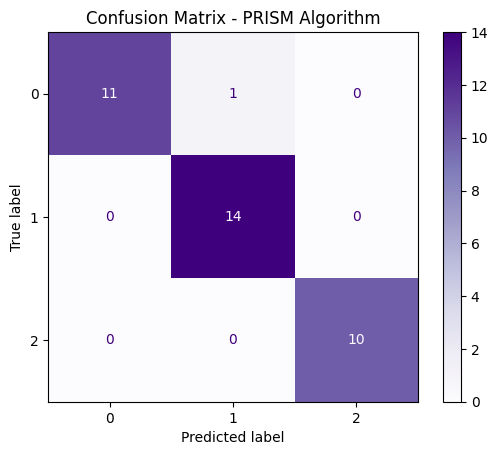

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [16]:
# Prediksi data test
y_pred = model.predict(X_test)

# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - PRISM Algorithm")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


## Interpretasi Hasil PRISM Algorithm

### 1. Pembagian Data
Dataset dibagi menjadi dua bagian:
- **80% data training (142 baris)** → digunakan untuk membentuk aturan (rules) PRISM.  
- **20% data testing (36 baris)** → digunakan untuk menguji performa model.

---

### 2. Aturan (Rules) yang Dihasilkan
Hasil dari algoritma PRISM menunjukkan beberapa pola klasifikasi yang jelas, di antaranya:

- **Rule 1:**  
  Jika `proline = High` **dan** `alcohol = High` → **kelas 0**  
  ➤ Artinya, wine dengan kadar proline dan alkohol tinggi cenderung termasuk dalam kelas 0.  
  Rule ini kuat karena memiliki *support* 100% dan *coverage* 66%.

- **Rule 2:**  
  Jika `flavanoids = Low` **dan** `color_intensity = Med` → **kelas 2**  
  ➤ Wine dengan flavanoids rendah dan intensitas warna sedang cenderung termasuk dalam kelas 2.  
  Rule ini memiliki *support* 100%, menunjukkan kekhususan tinggi.

- **Rule 3:**  
  Jika `color_intensity = Low` **dan** `alcohol = Low` → **kelas 1**  
  ➤ Wine dengan warna yang lebih terang dan kadar alkohol rendah biasanya merupakan kelas 1.  
  Rule ini memiliki *coverage* 64%, yang menunjukkan pola umum dalam data.

---

### 3. Hasil Evaluasi Model

#### Confusion Matrix
Dari confusion matrix terlihat bahwa:
- Kelas **0**: 11 benar, 1 salah  
- Kelas **1**: 14 benar, 0 salah  
- Kelas **2**: 10 benar, 0 salah  

Sehingga, model mencapai **akurasi sebesar 97%**

---

### 4. Classification Report

| Class | Precision | Recall | F1-Score |
|--------|------------|---------|----------|
| 0 | 1.00 | 0.92 | 0.96 |
| 1 | 0.93 | 1.00 | 0.97 |
| 2 | 1.00 | 1.00 | 1.00 |

Interpretasi:
- **Precision tinggi (≥0.93)** → prediksi yang dihasilkan sangat akurat dan jarang salah klasifikasi.  
- **Recall tinggi (≥0.92)** → sebagian besar data tiap kelas berhasil dikenali model.  
- **F1-score rata-rata 0.97** → model seimbang antara presisi dan sensitivitas.

---

### 🔹 5. Kesimpulan
- Algoritma **PRISM** berhasil menemukan pola yang logis dan mudah diinterpretasikan dari dataset wine.  
- Dengan tingkat akurasi 97%, model menunjukkan bahwa aturan yang terbentuk **tepat dan konsisten**.  
- PRISM efektif digunakan pada dataset seperti wine karena datanya memiliki **pola kategorikal yang jelas** setelah dilakukan proses *binning/discretization*.


# Predict New Data Points

In [37]:
#New data 

import pandas as pd

new_data = {
    'alcohol': [14.0, 14.0],
    'malic_acid': [2.0, 2.0],
    'ash': [2.3, 2.2],
    'alcalinity_of_ash': [19.0, 11.0],
    'magnesium': [95.0, 95.0],
    'total_phenols': [2.2, 2.5],
    'flavanoids': [0.5, 0.5],
    'nonflavanoid_phenols': [0.14, 0.5],
    'proanthocyanins': [1.6, 1.5],
    'color_intensity': [6.0, 6.0],
    'hue': [0.7, 0.6],
    'od280/od315_of_diluted_wines': [3.2, 3.0],
    'proline': [550.0, 1400.0]

}

new_df = pd.DataFrame(new_data)


In [38]:
# Tambahkan kolom binning agar sesuai dengan data training
def bin_alcohol(x):
    if x < 12.52:
        return "Low"
    elif x < 13.48:
        return "Med"
    else:
        return "High"

def bin_color_intensity(x):
    if x < 3.74:
        return "Low"
    elif x < 5.64:
        return "Med"
    else:
        return "High"

# Tambahkan dua kolom binning ke data baru
new_df['alcohol_bin'] = new_df['alcohol'].apply(bin_alcohol)
new_df['color_intensity_bin'] = new_df['color_intensity'].apply(bin_color_intensity)


In [39]:
# Prediksi kelas untuk data baru menggunakan model PRISM
preds = model.predict(new_df, leave_unknown=True)

print("Prediksi kelas untuk dua data baru:")
for i, p in enumerate(preds, 1):
    print(f"Sample {i}: Class {p}")


Prediksi kelas untuk dua data baru:
Sample 1: Class 2
Sample 2: Class 0


### Prediction Interpretation — PRISM Model

**Sample 1 → Predicted Class: 2**

- **Nilai penting (setelah dibinning):**  
  `alcohol = High`, `flavanoids = Low`, `color_intensity = High`, `hue = Low`.  
- **Rule yang diterapkan:**  
  `flavanoids = Low AND color_intensity = High AND hue = Low → class 2`
- **Penjelasan:**  
  PRISM mengidentifikasi bahwa kombinasi kadar flavanoids yang rendah dengan warna wine yang pekat (color intensity tinggi) dan nilai hue rendah sangat kuat berasosiasi dengan kelas **2** dalam data latih.  
  Artinya, **wine dengan kadar flavanoids rendah dan warna gelap cenderung termasuk ke dalam class 2.**  
- **Kekuatan rule:**  
  Rule ini memiliki *support* dan *coverage* yang tinggi (pada hasil training), karena 100% data dengan kondisi ini benar-benar milik class 2.

---

**Sample 2 → Predicted Class: 0**

- **Nilai penting (setelah dibinning):**  
  `alcohol = High`, `proline = High`, `alcalinity_of_ash = Low`.  
- **Rule yang diterapkan:**  
  `proline = High AND alcohol = High → class 0`
- **Penjelasan:**  
  PRISM mengenali bahwa wine dengan kadar alkohol tinggi dan kandungan proline tinggi sangat dominan berasal dari class **0**.  
  Ini menunjukkan bahwa **wine dengan karakter kuat (alkohol tinggi dan kaya proline)** biasanya termasuk dalam kategori class 0 pada dataset.  
- **Kekuatan rule:**  
  Rule ini juga kuat — memiliki 100% *support* untuk class 0 pada data training, artinya setiap wine yang memenuhi kondisi ini diklasifikasikan dengan benar oleh model.

---

### Kesimpulan Umum
- **Sample 1 (class 2)** mewakili wine dengan warna pekat dan flavanoids rendah (lebih ke tipe dark wine).  
- **Sample 2 (class 0)** mewakili wine dengan kadar alkohol dan proline tinggi (wine yang lebih kuat dan kompleks).  
- Kedua prediksi **selaras dengan pola aturan (rules)** yang ditemukan PRISM pada data training.  
- Tidak ada kasus *no prediction* karena kedua sample sesuai dengan rule yang sudah terbentuk sebelumnya.
